# Noise Data EDA : First Pass

- This notebook shows how to use the PPSD class defined in obspy.signal. The routine is useful for interpretation of e.g. noise measurements for site quality control checks.

- We provide stream as a waveform data (mseed file)

- The necessary information for PPSD is recorded in station metadata that includes information about the stations' operators, geographical locations, and the instrument's responses.

- Station metadatas are kept in StationXML files or dataless SEED files. Files can be read using the read_inventory() function that returns an Inventory object. (We took dataless Seed files and mseed files from http://eida.koeri.boun.edu.tr/webinterface/ . )




- PPSD is a class in ObsPy. It compiles probabilistic power spectral densities for one combination of network/station/location/channel/sampling_rate.



- We initialize a new PPSD by giving a trace from waveform data and metadata from station data. The ppsd object will then make sure that only appropriate data go into the probabilistic psd statistics.

In [8]:
from obspy import read, read_inventory
from obspy.io.xseed import Parser
from obspy.signal import PPSD
from obspy.imaging.cm import pqlx
import matplotlib.pyplot as plt

In [5]:
#Antarctica ,2010 July

#provide stream with the mseed file
st = read(r"/home/master/Desktop/Workspace/EarthML/obspy/data/japan_day.mseed")
print(st)
#select trace in the  stream by using trace's id
tr=st.select(id="G.INU.00.BHE")[0]

11 Trace(s) in Stream:
G.INU.00.BHE | 2020-01-02T00:00:00.011304Z - 2020-01-02T23:59:58.961304Z | 20.0 Hz, 1727980 samples
G.INU.00.BHN | 2020-01-02T00:00:00.011303Z - 2020-01-02T23:59:58.961303Z | 20.0 Hz, 1727980 samples
G.INU.00.BHZ | 2020-01-02T00:00:00.011303Z - 2020-01-02T23:59:58.961303Z | 20.0 Hz, 1727980 samples
G.INU.00.LHE | 2020-01-02T00:00:41.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86358 samples
G.INU.00.LHE | 2020-01-02T00:00:00.511303Z - 2020-01-02T00:00:40.511303Z | 1.0 Hz, 41 samples
G.INU.00.LHN | 2020-01-02T00:00:00.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86399 samples
G.INU.00.LHZ | 2020-01-02T00:00:00.511304Z - 2020-01-02T23:59:58.511304Z | 1.0 Hz, 86399 samples
G.INU.00.LME | 2020-01-02T00:00:00.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86399 samples
G.INU.00.LMN | 2020-01-02T00:00:00.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86399 samples
G.INU.00.LMZ | 2020-01-02T00:07:43.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 85936 samples
G

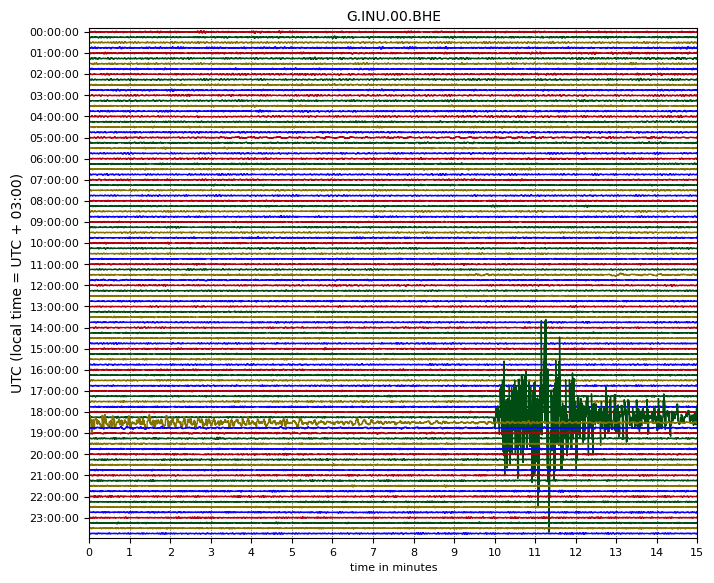

In [9]:
tr.plot(type='dayplot',vertical_scaling_range=2e4)
plt.show()

In [11]:
#take station metadata from the dataless seed file
inv=read_inventory(r"/home/master/Desktop/Workspace/EarthML/obspy/data/japan_ppsd.xml")

#Lets have a look inside metadata
print(inv)
#choose a network in inventory
net=inv[0]
#choose a station in the network
sta=net[0]
#choose a channel in the station
cha=sta[0]
print(cha)

Inventory created at 2024-09-01T15:17:41.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://ws.resif.fr/fdsnws/station/1/query
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (1):
			G
		Stations (1):
			G.INU (Inuyama, Japan)
		Channels (9):
			G.INU.00.BHZ, G.INU.00.BHN, G.INU.00.BHE, G.INU.00.LHZ, 
			G.INU.00.LHN, G.INU.00.LHE, G.INU.00.LMZ, G.INU.00.LMN, 
			G.INU.00.LME
Channel 'BHE', Location '00' 
	Time range: 2007-12-18T00:00:00.000000Z - 2500-12-31T23:59:59.000000Z
	Latitude: 35.3500, Longitude: 137.0290, Elevation: 132.0 m, Local Depth: 0.0 m
	Azimuth: 90.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 20.00 Hz
	Sensor (Description): None (STRECKEISEN STS1)
	Response information available


In [12]:
#initialize a new PPSD.
ppsd = PPSD(tr.stats, metadata=inv)

- Now we can add data (either trace or stream objects) to the ppsd estimate. This step may take a while. The return value True indicates that the data was successfully added to the ppsd estimate.

In [13]:
ppsd.add(st)

True

- Adding the same stream again will do nothing (return value False).

In [14]:
ppsd.add(st)

/home/master/Desktop/Workspace/.conda/lib/python3.11/site-packages/obspy/signal/spectral_estimation.py:895: UserWarning: Already covered time spans detected (e.g. 2020-01-02T00:00:00.011304Z), skipping these slices.
  warnings.warn(msg)
/home/master/Desktop/Workspace/.conda/lib/python3.11/site-packages/obspy/signal/spectral_estimation.py:895: UserWarning: Already covered time spans detected (e.g. 2020-01-02T00:30:00.011304Z), skipping these slices.
  warnings.warn(msg)
/home/master/Desktop/Workspace/.conda/lib/python3.11/site-packages/obspy/signal/spectral_estimation.py:895: UserWarning: Already covered time spans detected (e.g. 2020-01-02T01:00:00.011304Z), skipping these slices.
  warnings.warn(msg)
/home/master/Desktop/Workspace/.conda/lib/python3.11/site-packages/obspy/signal/spectral_estimation.py:895: UserWarning: Already covered time spans detected (e.g. 2020-01-02T01:30:00.011304Z), skipping these slices.
  warnings.warn(msg)
/home/master/Desktop/Workspace/.conda/lib/python3.11

False

- The graphical representation of the ppsd can be displayed in a matplotlib window

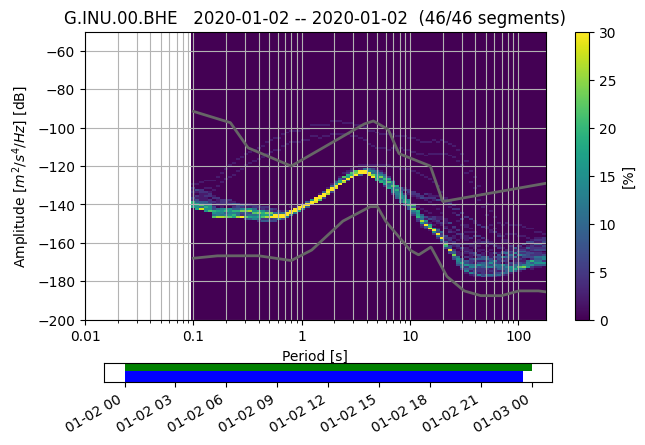

In [ ]:
ppsd.plot()

- A (for each frequency bin) cumulative version of the histogram can also be visualized:

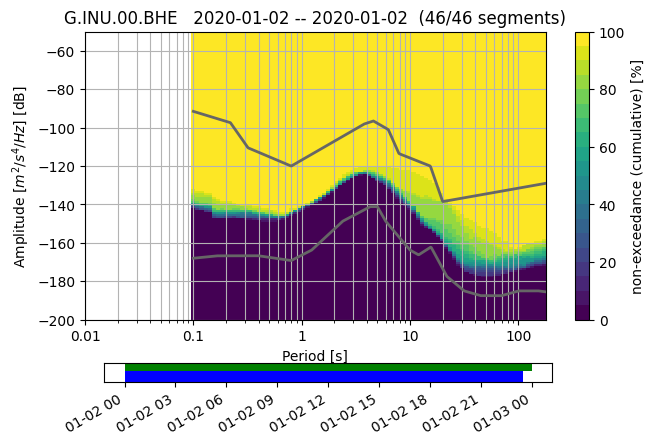

In [ ]:
ppsd.plot(cumulative=True)

- To use the colormap used by PQLX / [McNamara2004] you can import and use that colormap from obspy.imaging.cm:

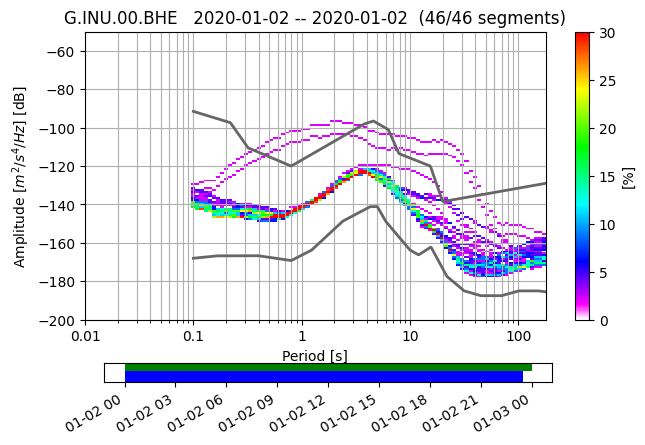

In [ ]:
ppsd.plot(cmap=pqlx)

## Ex 1)  We try to see effect of volcanic microseismic noise on the below example

- Piton de la Fournaise volcano erupts on Reunion island (27-04-2018)
https://www.youtube.com/watch?v=WnNLTqH-pGI

In [ ]:
#Reunion Island(France),  Piton de la Fournaise Volcano Observatory, 2019
st1 = read("/Users/zeynepodabass/Downloads/Volcano2018.mseed")
tr1=st1[0]
print(tr1)

PF.BOR.00.EHE | 2018-04-28T00:59:54.713130Z - 2018-04-29T00:00:03.343130Z | 100.0 Hz, 8280864 samples


In [ ]:
inv=read_inventory("/Users/zeynepodabass/Downloads/Volcano2018_0.xml")
ppsd = PPSD(tr1.stats, metadata=inv)

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:855: UserWarning: No traces with matching SEED ID in provided stream object.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


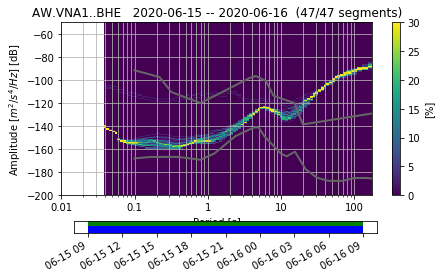

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


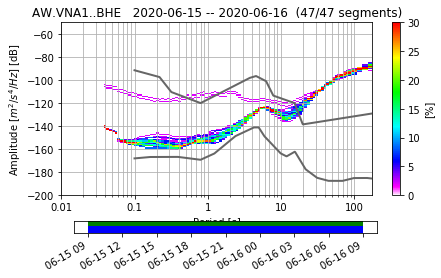

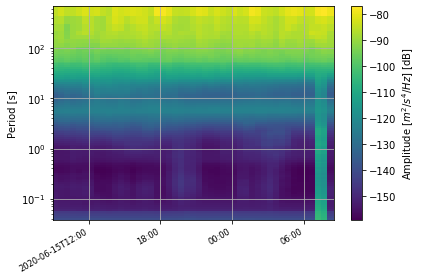

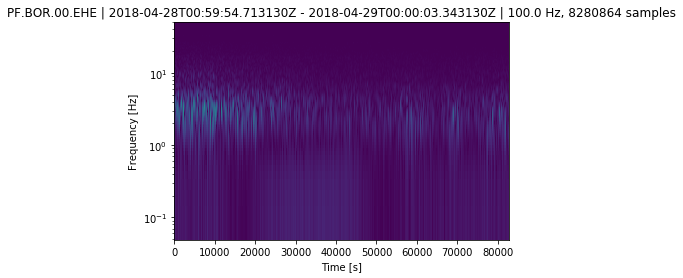

In [ ]:

ppsd.add(st1)

ppsd.plot()
ppsd.plot(cmap=pqlx)
ppsd.plot_spectrogram()

tr1.spectrogram(log=True)

## Ex 2) We try to see effect of seiche noise on the below example

- The long-period power levels are so low near the NLNM.

In [ ]:
#Lisbon 2019-07-12 23:00:00  23:59:00
st2 = read("/Users/zeynepodabass/Downloads/Package_1594578413900.mseed")
tr2=st2[0]
print(tr2)

LX.GGNV..BHE | 2019-07-12T22:59:50.319538Z - 2019-07-13T00:00:10.519538Z | 20.0 Hz, 72405 samples


In [ ]:
inv=read_inventory("/Users/zeynepodabass/Downloads/Package_1594578413900_0.xml")
ppsd = PPSD(tr2.stats, metadata=inv)

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:855: UserWarning: No traces with matching SEED ID in provided stream object.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


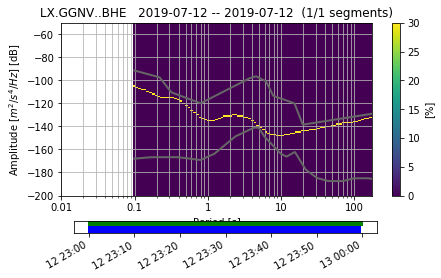

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


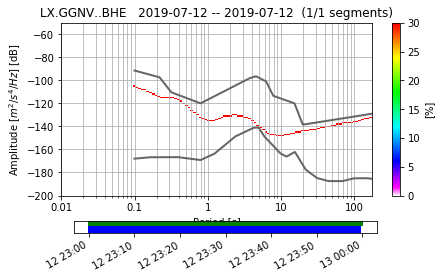

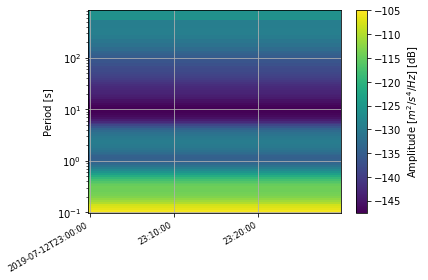

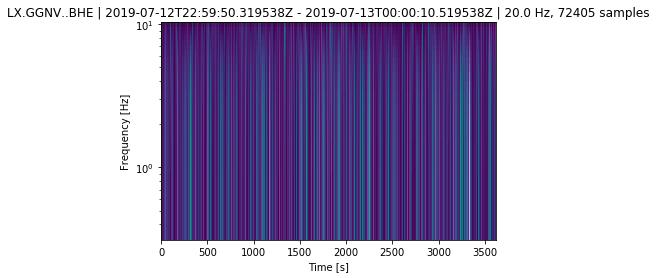

In [ ]:
ppsd.add(st2)

st2 = read("https://examples.obspy.org/BW.KW1..EHZ.D.2011.038")
ppsd.add(st2)

ppsd.plot()
ppsd.plot(cmap=pqlx)
ppsd.plot_spectrogram()

tr2.filtered=tr2.copy()
tr2.filtered.filter("bandpass", freqmin=2, freqmax=4 )

tr2.filtered.spectrogram(log=True)

## Ex 3) We try to see effect of island based microseismic noise on the below examples. And compare its effect respect to seasonal changes.

- Island-based stations often show higher-power broadband microseism peaks that are generated by surface waves associated with ocean wave action.

DK.ICESG..BHE | 2011-06-14T08:58:51.849998Z - 2011-06-14T21:01:51.299998Z | 20.0 Hz, 867590 samples


/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


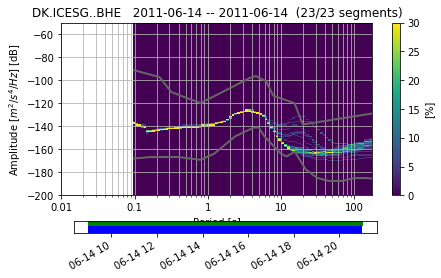

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


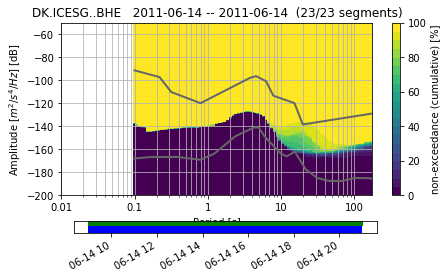

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


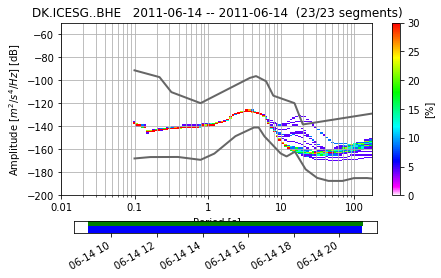

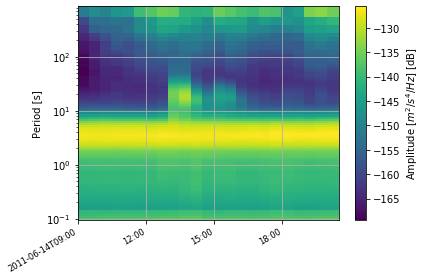

In [ ]:
#Greenland ,2011 June
st4 = read("/Users/zeynepodabass/Downloads/Greenland_2011_June.mseed")
tr4=st4[0]
print(tr4)

inv=read_inventory("/Users/zeynepodabass/Downloads/Greenland_2011_June_0.xml")
ppsd = PPSD(tr4.stats, metadata=inv)
ppsd.add(st4)


ppsd.plot()
ppsd.plot(cumulative=True)
ppsd.plot(cmap=pqlx)

ppsd.plot_spectrogram()


DK.ICESG..BHE | 2011-06-14T08:58:51.849998Z - 2011-06-14T21:01:51.299998Z | 20.0 Hz, 867590 samples


/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


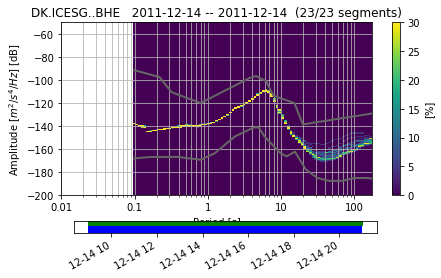

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


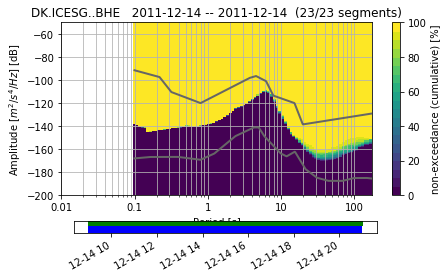

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


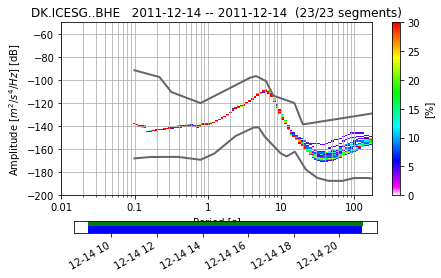

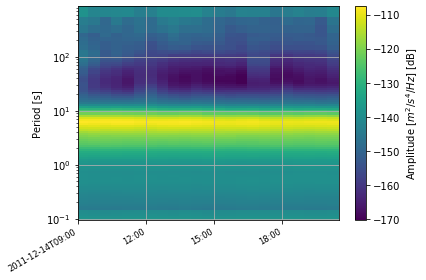

In [ ]:
#Greenland ,2011 December
st5 = read("/Users/zeynepodabass/Downloads/Greenland_2011_Dec.mseed")
tr5=st5[0]
print(tr4)

inv=read_inventory("/Users/zeynepodabass/Downloads/Greenland_2011_Dec_0.xml")
ppsd = PPSD(tr5.stats, metadata=inv)
ppsd.add(st5)


ppsd.plot()
ppsd.plot(cumulative=True)
ppsd.plot(cmap=pqlx)

ppsd.plot_spectrogram()

## Ex 4) We try to see effect of cultural noise on the below examples. And compare its effect respect to seasonal changes.

- The long-period power levels are so low near the NLNM.

NA.SEUS..BHE | 2011-01-15T08:59:45.944500Z - 2011-01-16T01:01:15.719500Z | 40.0 Hz, 2307592 samples


/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


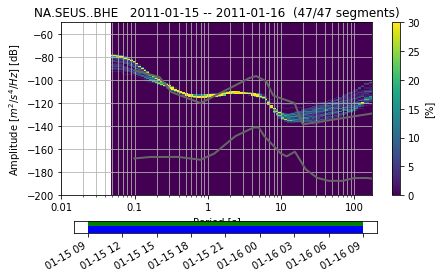

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


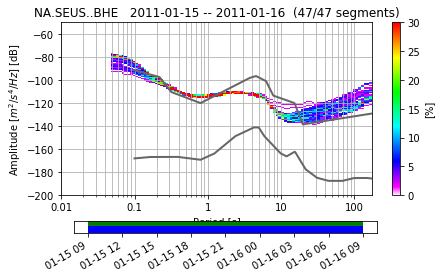

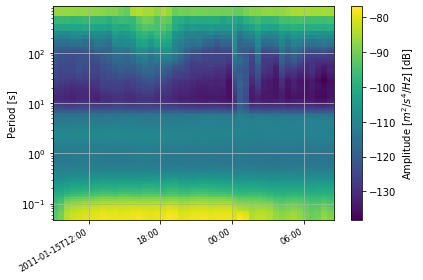

In [ ]:
#Caribbean Neatherlands (St. Eustatius Airport),2011 January
st6 = read("/Users/zeynepodabass/Downloads/Caribbean_airport_2011Jan.mseed")
tr6=st6[0]
print(tr6)

inv=read_inventory("/Users/zeynepodabass/Downloads/Caribbean_airport_2011Jan_0.xml")
ppsd = PPSD(tr6.stats, metadata=inv)
ppsd.add(st6)

ppsd.plot()
ppsd.plot(cmap=pqlx)

ppsd.plot_spectrogram()

NA.SEUS..BHE | 2011-06-15T08:59:46.069500Z - 2011-06-16T08:59:49.194500Z | 40.0 Hz, 3456126 samples


/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


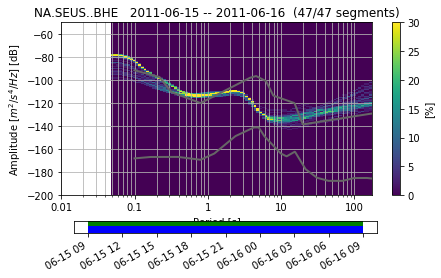

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


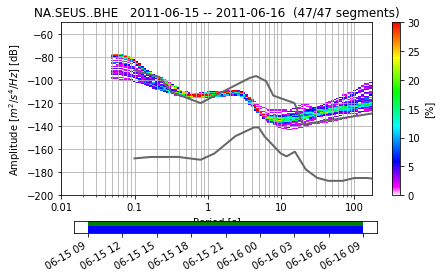

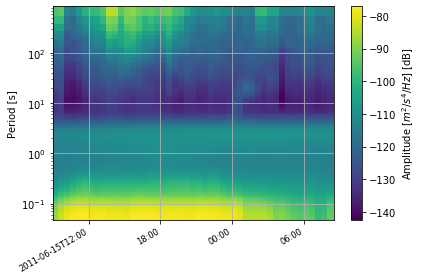

In [ ]:
#Caribbean Neatherlands (St. Eustatius Airport),2011 June
st6 = read("/Users/zeynepodabass/Downloads/Caribbean_airport_2011June.mseed")
tr6=st6[0]
print(tr6)

inv=read_inventory("/Users/zeynepodabass/Downloads/Caribbean_airport_2011June_0.xml")
ppsd = PPSD(tr6.stats, metadata=inv)
ppsd.add(st6)

ppsd.plot()
ppsd.plot(cmap=pqlx)

ppsd.plot_spectrogram()

## Ex 5) We try to see effect of sea ice noise on the below examples. And compare its effect respect to seasonal changes.

- Microseism power is potentially affected by any process that alters ocean wave intensity since thick sea ice prevents large ocean waves from forming this ice significantly affects microseism amplitudes.

- During the summer months ocean waves create a broadband (0.2–10 s) microseism. In winter, when sea ice dampens ocean wave heights, short-period (0.1–1.2 s) microseism power is significantly reduced (10–20 dB).


AW.VNA1..BHE | 2020-01-15T08:59:55.188391Z - 2020-01-16T09:00:10.028391Z | 50.0 Hz, 4320743 samples


/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


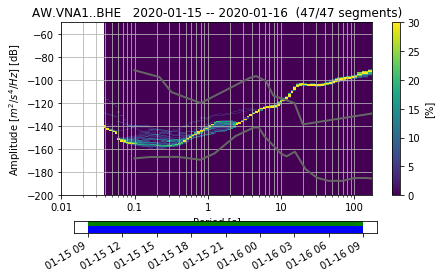

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


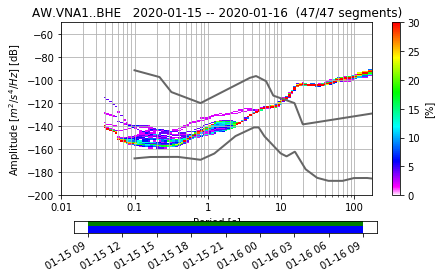

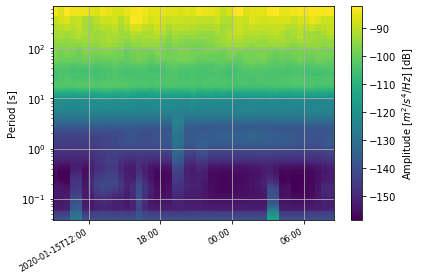

In [ ]:
#Antarctica, 2020 January
st6 = read("/Users/zeynepodabass/Downloads/Antarctica_2020January.mseed")
tr6=st6[0]
print(tr6)

inv=read_inventory("/Users/zeynepodabass/Downloads/Antarctica_2020January_0.xml")
ppsd = PPSD(tr6.stats, metadata=inv)
ppsd.add(st6)

ppsd.plot()
ppsd.plot(cmap=pqlx)

ppsd.plot_spectrogram()

AW.VNA1..BHE | 2020-06-15T08:59:53.768391Z - 2020-06-16T09:00:06.948391Z | 50.0 Hz, 4320660 samples


/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


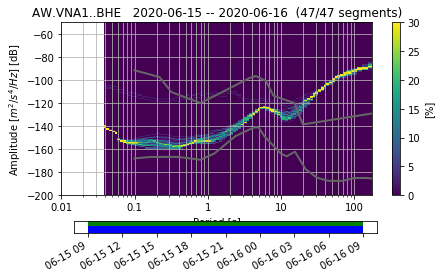

/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


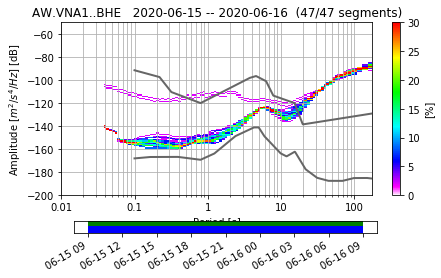

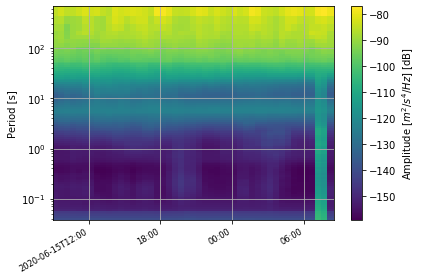

In [ ]:
#Antarctica, 2020 June
st6 = read("/Users/zeynepodabass/Downloads/Antarctica_2020June.mseed")
tr6=st6[0]
print(tr6)

inv=read_inventory("/Users/zeynepodabass/Downloads/Antarctica_2020June_0.xml")
ppsd = PPSD(tr6.stats, metadata=inv)
ppsd.add(st6)

ppsd.plot()
ppsd.plot(cmap=pqlx)

ppsd.plot_spectrogram()